## Imports

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;

Data imports

In [21]:
AList = np.loadtxt("../Data/2pe2e_acc//Acceleration.txt");
VList = np.loadtxt("../Data/2pe2e_acc/LatticeDepth.txt");

AVListIndex = np.loadtxt("../Data/1pe2e acc/AVIndex.txt", dtype = int);
MomProb = np.loadtxt("../Data/1pe2e acc/MomentumProbability.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

In [23]:
VList.size

21

## Defining preliminary probabilities
- Define central values for acc and Lattice depth $(a_0,V_0)$ and corresponding _actual probability distirbution_ $P(p|a_0,V_0)$. .
- Import all other pairs of $(a,V)$ and their corresponding probabilitiy distributions $P(p|a,V)$ generated using the learned shaking sequence for $(a_0,V_0)$. 

In [20]:
 np.ones(len(P_actual))/len(P_actual)

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [85]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);


a0= 0.0; V0= 0.0;
P_actual=np.array([0.00834397 , 0.0214347,  0.0257265,  0.0569216 ,  0.287075 ,  0.175322 , 0.0382574  , 0.358685 , 0.0081925, 0.00654235  ,0.0134994]);
epsilon = 0.5;
P_error = np.array( [ 0.00158886 ,  0.0289448  , 0.0129811 ,    0.17899  ,  0.028321,   0.0413507  ,  0.559008  , 0.0504661 ,  0.0788694  , 0.0194702 ,9.67359e-06]);
P_simulated = (1-epsilon)*P_actual+epsilon*P_error;
#P_actual = np.array( [ 0.00158886 ,  0.0289448  , 0.0129811 ,    0.17899  ,  0.028321,   0.0413507  ,  0.559008  , 0.0504661 ,  0.0788694  , 0.0194702 ,9.67359e-06]);

P_actual=P_actual/np.sum(P_actual);
P_simulated=P_simulated/np.sum(P_simulated);

Generate samples from the $(a_0,V_0)$ probability distribution

In [86]:
Runs=1000; # How many simulated data do we want
outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated);
unique, frequency = np.unique(outcomes, return_counts = True);

Check that the generated distribution does match actual probabilities $P(p|a_0,V_0)$.

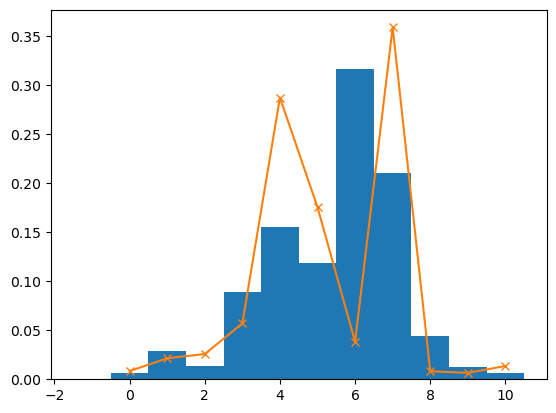

In [87]:
ax=plt.gca();
ax.hist(outcomes,  density = True,stacked = True, bins = np.arange(-1.5,11.5));
ax.plot(PossibleOutcomes, P_actual, 'x-');

In [ ]:
frequencyprob = frequency/np.sum(frequency)

In [ ]:
""" PaVprior = np.full(AList.size,1)/(AList.size);
np.sum(PaVprior)

stdTime=[];
plotPaV=[[]];
for i in range(AList.size):
    indexpair = AVListIndex[i];
    MomentumProbabilities = MomProb[i];
    for m in outcomes:
        PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

        mean = np.dot(AList, PaVprior)
        sq = np.dot (np.power(AList, 2), PaVprior)
        
        stdTime.append(np.sqrt( sq- mean**2)); """

## Bayesian Updating

In [88]:
PaVprior = np.full(AList.size,1)/(AList.size);
np.sum(PaVprior)

stdTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    mean = np.dot(AList, PaVprior)
    sq = np.dot (np.power(AList, 2), PaVprior)
    stdTime.append(np.sqrt( sq- mean**2));

Multiparameter acceleration case

In [6]:
PaVprior = np.full((AList.size, VList.size),1)/(AList.size*VList.size);
print(PaVprior)

[[0.00093371 0.00093371 0.00093371 ... 0.00093371 0.00093371 0.00093371]
 [0.00093371 0.00093371 0.00093371 ... 0.00093371 0.00093371 0.00093371]
 [0.00093371 0.00093371 0.00093371 ... 0.00093371 0.00093371 0.00093371]
 ...
 [0.00093371 0.00093371 0.00093371 ... 0.00093371 0.00093371 0.00093371]
 [0.00093371 0.00093371 0.00093371 ... 0.00093371 0.00093371 0.00093371]
 [0.00093371 0.00093371 0.00093371 ... 0.00093371 0.00093371 0.00093371]]


In [15]:


#stdTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size*VList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0], indexpair[1]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    #mean = np.dot(AList, PaVprior)
    #sq = np.dot (np.power(AList, 2), PaVprior)
    #stdTime.append(np.sqrt( sq- mean**2));

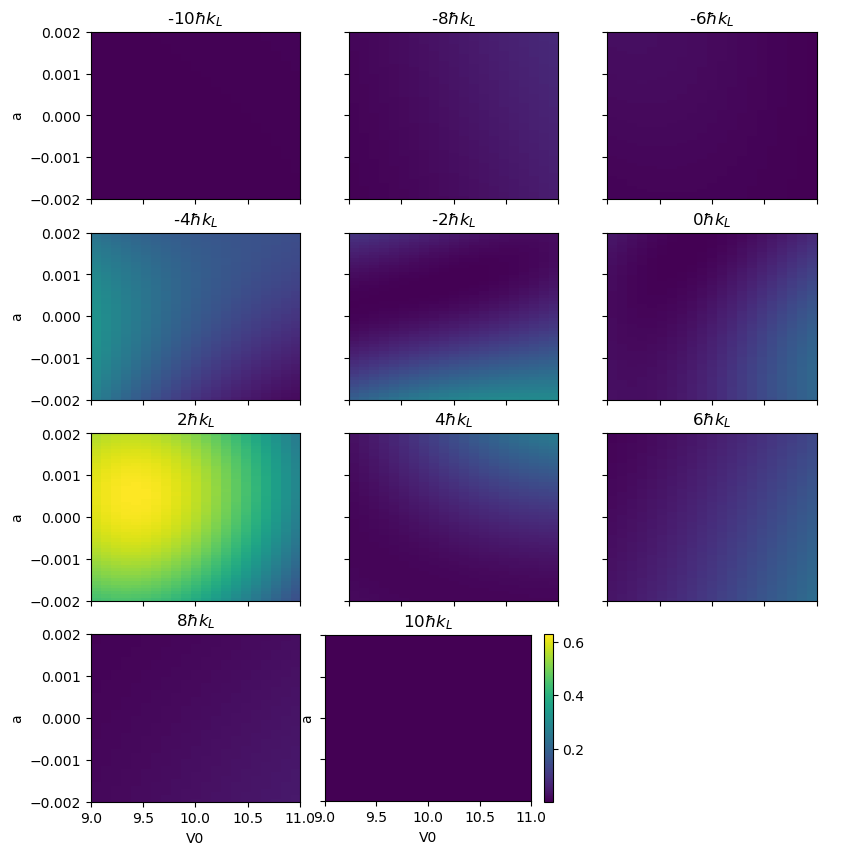

In [8]:
fig=plt.figure(figsize=(10,10))
gs = fig.add_gridspec(4, 3, hspace=0.2, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[-1,-1].axis("off");

minn = np.min(MomProb);
maxx = np.max(MomProb);
for i in range(11):
    ax = axs[i//3, i% 3];
    im=ax.imshow(np.reshape(MomProb[:,i], (AList.size,VList.size)), extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=400, vmin=minn, vmax = maxx, label=str(2*i-10)+"$\hbar k_L$")


    ax.set_title(str(-10+2*i)+"$\hbar k_L$")
    ax.set_xlabel("V0")
    ax.set_ylabel("a")

fig.colorbar(im,  orientation='vertical')


for ax in fig.get_axes():
    ax.label_outer()

plt.show()

Text(0, 0.5, '$n\\hbar k_L$')

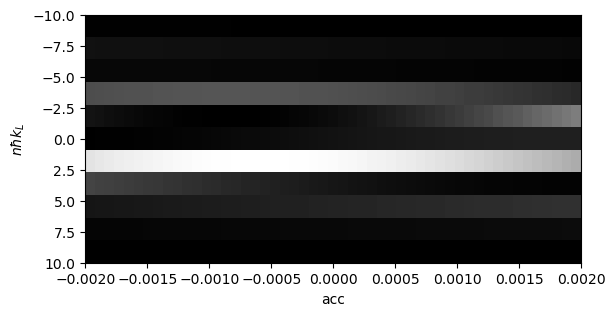

In [26]:
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
plt.imshow(datamom[:,10,:].transpose(), cmap='gray', extent=(AList[0],AList[-1], 10,-10), aspect=1/10000)
plt.xlabel("acc")
plt.ylabel("$n\hbar k_L$")

Text(0, 0.5, '$n\\hbar k_L$')

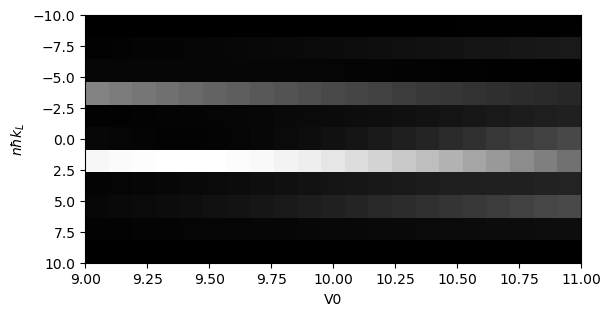

In [28]:
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
plt.imshow(datamom[25,:,:].transpose(), cmap='gray', extent=(VList[0],VList[-1], 10,-10), aspect=1/20)
plt.xlabel("V0")
plt.ylabel("$n\hbar k_L$")

In [ ]:
reshaped=np.reshape(AVListIndex, (AList.size, VList.size,2))
reshaped[:,11,:]

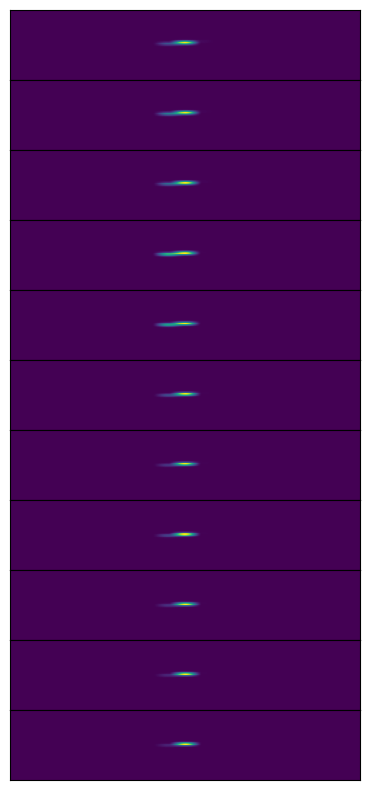

In [16]:
fig = plt.figure();
fig.set_figheight(10)
gs = fig.add_gridspec(len(plotPaV), hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
# fig.suptitle('P(a,V|m) with successive m')


# Hide x labels and tick labels for all but bottom plot.
for i in range(len(plotPaV)):
    axs[i].imshow(plotPaV[i], extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=100);
    axs[i].set_xticks([])
    axs[i].set_yticks([])

for ax in axs:
    ax.label_outer()

## Plotting

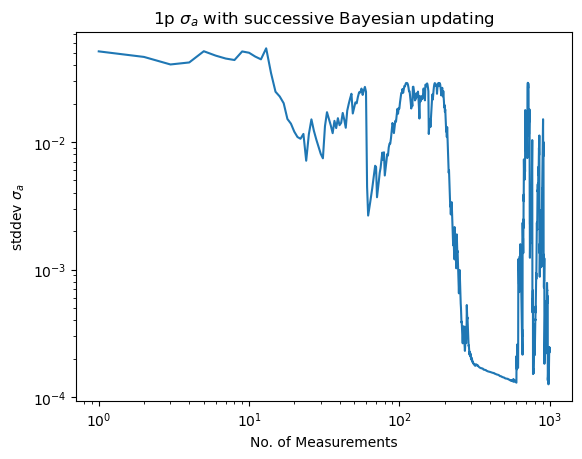

In [91]:
plt.loglog(range(1, len(outcomes)+1),stdTime)
plt.xlabel("No. of Measurements");
plt.ylabel("stddev $\sigma_a$")
plt.title("1p $\sigma_a$ with successive Bayesian updating")
plt.savefig("stddev.png")

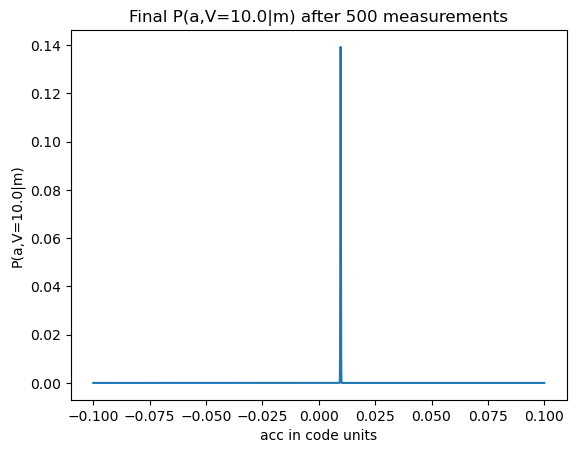

<Figure size 640x480 with 0 Axes>

In [92]:
plt.plot(AList,PaVprior)
plt.xlabel("acc in code units")
plt.ylabel("P(a,V=10.0|m)")
plt.title("Final P(a,V=10.0|m) after 500 measurements")
plt.show()
plt.savefig("acc.png")

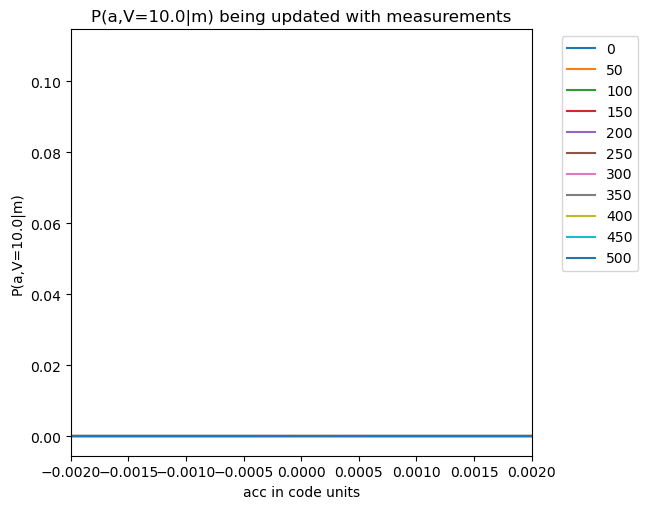

<Figure size 640x480 with 0 Axes>

In [62]:
for i in range(plotPaV.shape[0]):
    plt.plot(AList,plotPaV[i], label=str(i*50));
plt.xlim(-0.002,0.002)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.xlabel("acc in code units")
plt.ylabel("P(a,V=10.0|m)")
plt.title("P(a,V=10.0|m) being updated with measurements")
plt.show()
plt.savefig("zoomedinacc.png")

In [ ]:
plt.loglog(range(100, len(stdTime)+1), stdTime[99:])

In [ ]:
x = np.log(range(100, len(stdTime)+1))
y = np.log(stdTime[ 99:]);

(m,b), (SSE,),*_ =np.polyfit(x, y, deg=1, full=True)

In [ ]:
plt.plot(x,y, label="data")
plt.plot(x,m*x+b, label="fit")
plt.xlabel('log(N_m)')
plt.ylabel("log(\sigma_a)")
plt.legend()
plt.title("Fitting sensitivities to extract CFI")
plt.grid(True)
plt.savefig('Fitsens.png')


In [ ]:
cfibayesian = np.exp(-2*b)
print(cfibayesian)

In [ ]:
PaVprior = np.full(AList[2000:3001].size,1)/(AList[2000:3001].size);
np.sum(PaVprior)

stdTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(2000,3001):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    mean = np.dot(AList[2000:3001], PaVprior)
    sq = np.dot (np.power(AList[2000:3001], 2), PaVprior)
    stdTime.append(np.sqrt( sq- mean**2));

Scratch

In [ ]:
VList.size*AList.size

In [ ]:
plt.imshow(PaVprior)

In [ ]:
PaVprior

In [20]:
datamom[25,10,:]-[1.58957656e-03, 2.89464310e-02 ,1.29810901e-02 ,1.78989933e-01,
 2.83210388e-02, 4.13504639e-02 ,5.59004786e-01 ,5.04655221e-02,
 7.88692407e-02, 1.94715680e-02, 9.68698096e-06]

array([-7.165600e-07, -1.631000e-06,  9.900000e-09,  6.700000e-08,
       -3.880000e-08,  2.361000e-07,  3.214000e-06,  5.779000e-07,
        1.593000e-07, -1.368000e-06, -1.339096e-08])

## Units

In [3]:
#Lambda = 852*10**(-9);
Lambda = 1064*10**(-9);
k_L = 2*np.pi / Lambda;
hbar = 1.054571817*10**(-34);
atomicmass = 86.90918;
massDalton = 1.660539*10**(-27);
mass = atomicmass * massDalton;
E_R = (hbar * k_L)**2 /(2*mass);

In [4]:
accUnit= 2*(E_R)**2/(hbar**2*k_L)

In [13]:
codeacc = 0.025;
realacc = codeacc*accUnit

In [14]:
realacc/10

0.1374509010255584

In [16]:
realacc = 0.125*9.81;
codeacc = realacc/accUnit
print(codeacc)

0.022303418727171242


## Jenson-Shannon Divergence

In [7]:
def KLDivergence( P, Q):
    if len(P) != len(Q):
        return None;
    sum =0;

    for i in range(len(P)):
        sum = np.dot(P, np.log2( np.divide(P, Q)));

    return sum;


Let's do a sanity check

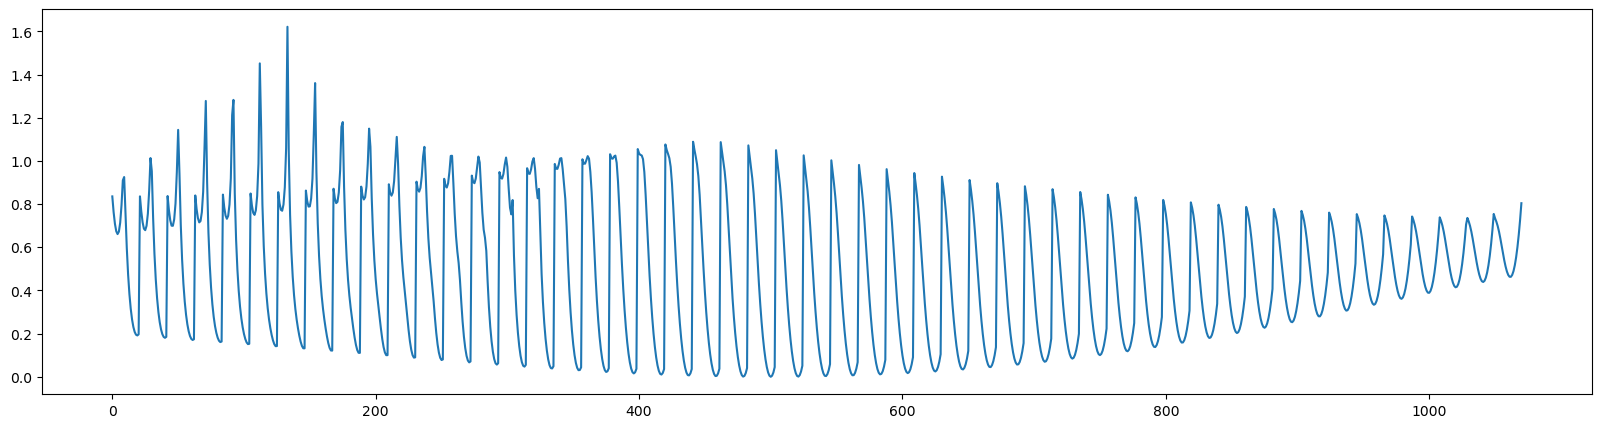

In [17]:
plt.figure(figsize= (20,5))

plt.plot([KLDivergence(MomProb[500],MomProb[i]) for i in range(MomProb.shape[0] ) ] )

The above data makes sense: the overall minimum is when I calculate the KL divergence with itself. However, there are oscillations, since the large array MomProb oscillates between different $V_0$ for same value of $a$. 

In [18]:
def JSDivergence( P, Q):
    M = (P+Q)/2;
    JS = 0.5 * ( KLDivergence(P,M) + KLDivergence(Q, M));
    return JS;


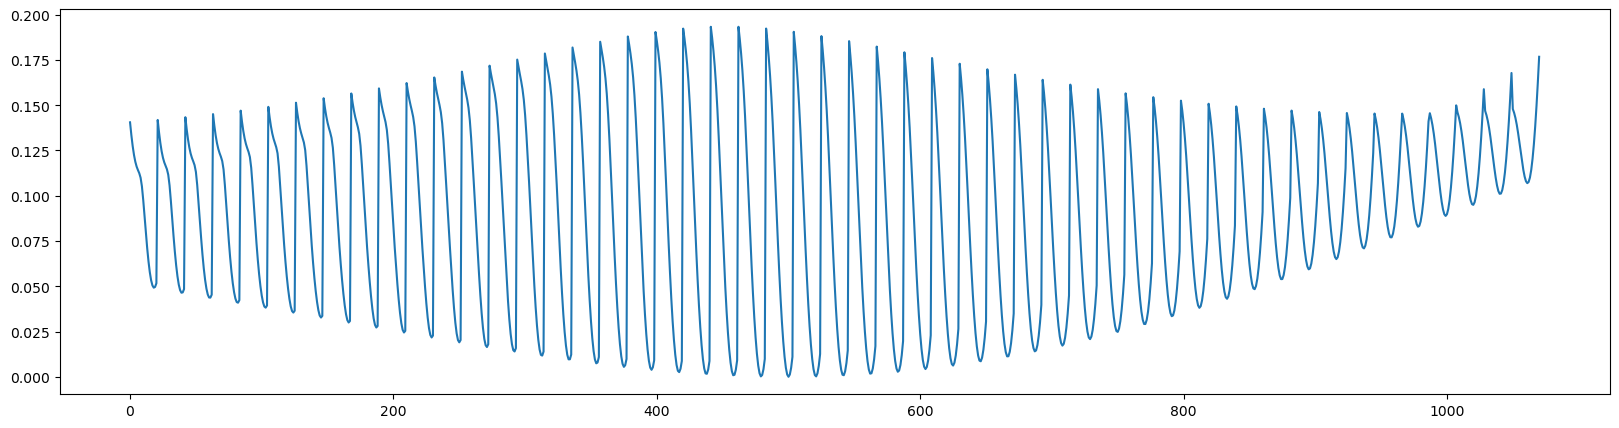

In [19]:
plt.figure(figsize= (20,5))

plt.plot([JSDivergence(MomProb[500],MomProb[i]) for i in range(MomProb.shape[0] ) ] )

In [25]:
print(MomProb.shape)
print(AList.shape)
print(VList.shape)
print(AList.shape[0]*VList.shape[0])

(1071, 11)
(51,)
(21,)
1071


Implementung pseudocode:
- Pick a value for $V_0$ and all entries of index pairs for this value of $V_0$

In [38]:
 np.where(AVListIndex==11)

(array([  11,   32,   53,   74,   95,  116,  137,  158,  179,  200,  221,
         231,  232,  233,  234,  235,  236,  237,  238,  239,  240,  241,
         242,  242,  243,  244,  245,  246,  247,  248,  249,  250,  251,
         263,  284,  305,  326,  347,  368,  389,  410,  431,  452,  473,
         494,  515,  536,  557,  578,  599,  620,  641,  662,  683,  704,
         725,  746,  767,  788,  809,  830,  851,  872,  893,  914,  935,
         956,  977,  998, 1019, 1040, 1061]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]))

In [40]:
AVListIndex[np.where(AVListIndex[:,1]==11)[0]]

array([[ 0, 11],
       [ 1, 11],
       [ 2, 11],
       [ 3, 11],
       [ 4, 11],
       [ 5, 11],
       [ 6, 11],
       [ 7, 11],
       [ 8, 11],
       [ 9, 11],
       [10, 11],
       [11, 11],
       [12, 11],
       [13, 11],
       [14, 11],
       [15, 11],
       [16, 11],
       [17, 11],
       [18, 11],
       [19, 11],
       [20, 11],
       [21, 11],
       [22, 11],
       [23, 11],
       [24, 11],
       [25, 11],
       [26, 11],
       [27, 11],
       [28, 11],
       [29, 11],
       [30, 11],
       [31, 11],
       [32, 11],
       [33, 11],
       [34, 11],
       [35, 11],
       [36, 11],
       [37, 11],
       [38, 11],
       [39, 11],
       [40, 11],
       [41, 11],
       [42, 11],
       [43, 11],
       [44, 11],
       [45, 11],
       [46, 11],
       [47, 11],
       [48, 11],
       [49, 11],
       [50, 11]])

In [51]:
momindices=np.where(AVListIndex[:,1]==15)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

In [52]:
no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

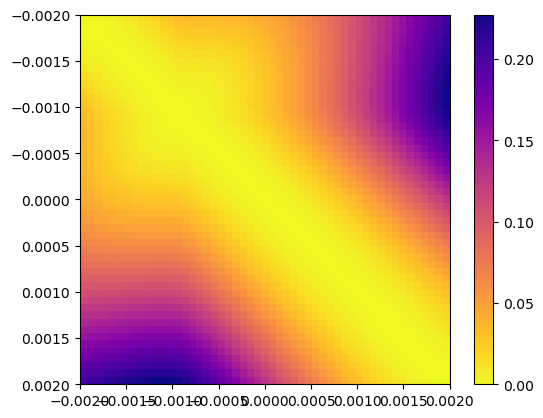

In [60]:
plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0], acc[-1], acc[-1], acc[0] ])
plt.colorbar()

Text(0.5, 1.0, '10.0')

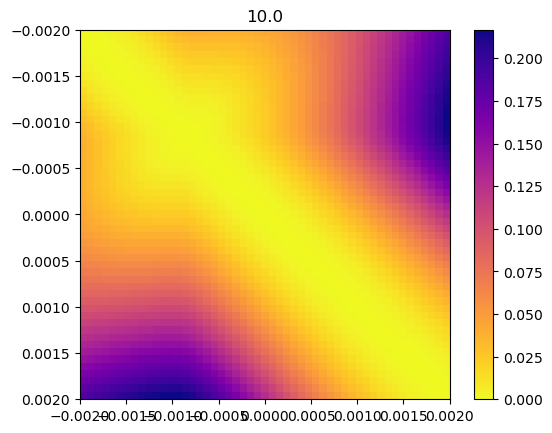

In [82]:
momindices=np.where(AVListIndex[:,1]==10)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

accindices = indices[:, 0];
acc = AList[accindices]

no_of_values = len(accindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in accindices:
    for j in accindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0], acc[-1], acc[-1], acc[0] ])
plt.colorbar()
plt.title(VList[10])

Text(0.5, 1.0, 'a = 0.0')

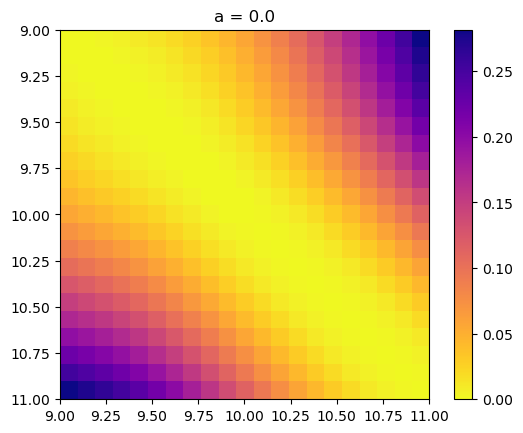

In [68]:
momindices=np.where(AVListIndex[:,0]==25)[0];
momproblist =MomProb[momindices];
indices = AVListIndex[momindices];

lattindices = indices[:, 1];
latt = VList[lattindices]

no_of_values = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in lattindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist[i], momproblist[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], latt[-1], latt[0] ])
plt.colorbar()
plt.title("a = "+ str(AList[25]))

Cross-correlation

Text(0.5, 1.0, 'cross correlation')

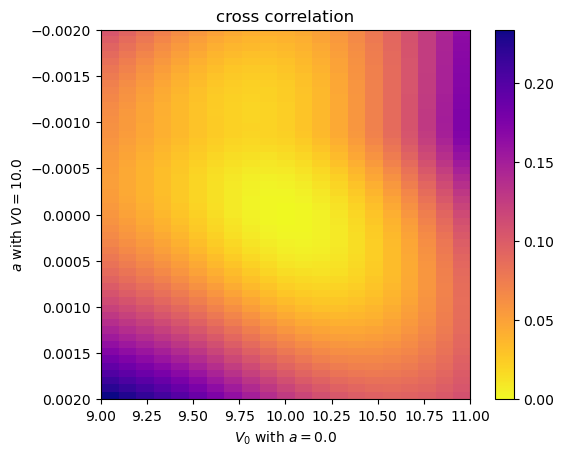

In [83]:
momindices_a=np.where(AVListIndex[:,1]==10)[0];
momproblist_a =MomProb[momindices_a];
indices_a = AVListIndex[momindices_a];

momindices_V=np.where(AVListIndex[:,0]==25)[0];
momproblist_V =MomProb[momindices_V];
indices_V = AVListIndex[momindices_V];

accindices = indices_a[:, 0];
acc = AList[accindices];

lattindices = indices_V[:, 1];
latt = VList[lattindices]

no_of_values_a = len(accindices);
no_of_values_V = len(lattindices);
JSDivergenceMatrix=np.zeros((no_of_values_a, no_of_values_V)) ;

for i in accindices:
    for j in lattindices:
        JSDivergenceMatrix [i][j]= JSDivergence(momproblist_a[i], momproblist_V[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[latt[0], latt[-1], acc[-1], acc[0] ], aspect=500)
plt.xlabel("$V_0$ with $a=$"+str(AList[25]))
plt.ylabel("$a$ with $V0=$"+str(VList[10]))
plt.colorbar()
plt.title("cross correlation")


## Estimate Time

In [26]:
TotalDataPoints = 100*50
No_seconds = TotalDataPoints / 2.0;
No_hours = No_seconds/3600;
print(No_hours)

0.6944444444444444
